In [129]:
import pandas as pd
import numpy as np
import sqlite3

In [130]:
# connect to the database and  retrieve cleaned data
conn = sqlite3.connect("./database/movies_db_nj.sqlite")
cur = conn.cursor()

In [131]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_name_basics',),
 ('imdb_title_ratings',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('rt_reviews',),
 ('imdb_title_akas',),
 ('tn_movies_budgets',),
 ('tmdb_movies',),
 ('rt_movies_info',)]

In [133]:
#retrieve popularity, profit and genres from the respective tables so that they can be compared.
df = pd.DataFrame(cur.execute('''SELECT popularity, profit, genres
                                 FROM tmdb_movies tm
                                 JOIN imdb_title_basics tb
                                 USING('original_title')
                                 JOIN tn_movies_budgets mb
                                 ON mb.movie_title= tm.title;'''))
df.columns = [x[0] for x in cur.description]


In [134]:
#genres is currently stored as combination of movies. These are seperated and then used to create a list of genres.
genres = []
for value in df['genres']:
    genres_list = value.split(',')
    for genre in genres_list:
        genres.append(genre)
genres = np.unique(genres)


In [135]:
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], dtype='<U11')

In [136]:
# a dataframe is created using  the genres list generated above and then an index set of the movie count, profit and popularity.
# Starting values are zeroes.
a = np.zeros(shape=(3,len(genres)))
index_names = ['Movie Count', 'Profit', 'Popularity']
genres_df = pd.DataFrame(a, index=index_names, columns=genres)
genres_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
Movie Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Profit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Popularity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# count how many movies for each genre and increment the value in the dataframe.
for value in df['genres']:
    genres_list = value.split(',')
    for item in genres_list:
        try:
            genres_df[item]['Movie Count'] += 1
        except:
            continue

In [138]:
genres_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
Movie Count,670.0,464.0,167.0,264.0,757.0,393.0,556.0,1718.0,226.0,189.0,...,35.0,233.0,4.0,2.0,327.0,211.0,82.0,614.0,56.0,24.0
Profit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Popularity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# This loop adds the median runtime and the median of the popularity to a genres_df
# median is selected because it is less affected by outliers.
for genre in genres_df.columns:
    genres_df[genre]['Profit'] =  df['profit'].loc[df['genres'].str.contains(genre)].median()
    genres_df[genre]['Popularity'] =  df['popularity'].loc[df['genres'].str.contains(genre)].median()


In [140]:
df['popularity'].describe()

count    3625.000000
mean        8.474847
std         8.060307
min         0.600000
25%         1.244000
50%         7.725000
75%        12.437000
max        80.773000
Name: popularity, dtype: float64

Looks like there are some outliers in popularity that needs to be removed.

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

# genres_df.plot.hist(alpha = 0.7); 
movie_count_data = genres_df.iloc[0]

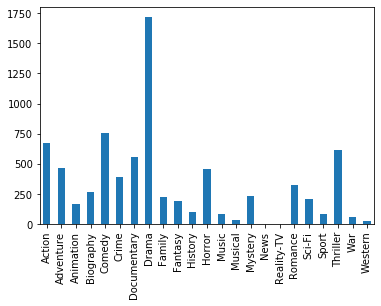

In [142]:
movie_count_data.plot(kind='bar')


Dramas seem to be genre that is made the most, followed by comedy.

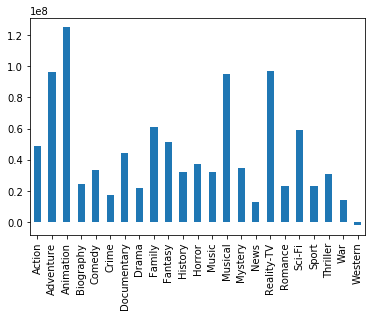

In [143]:
profit_data = genres_df.iloc[1]
profit_data.plot(kind='bar')

Animation, adventure, musical and Reality-TV are more profitable. Dramas are not as profitable as the amount of movies that are made for it might suggest.

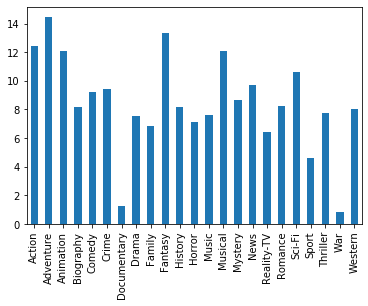

In [144]:
# plot for how popular the different genres are
popular_data = genres_df.iloc[2]
popular_data.plot(kind='bar')

Adventure, Fantasy, Adventure and Musical are very popular, documentaries and war movies not so much.

In [201]:
import seaborn as sns

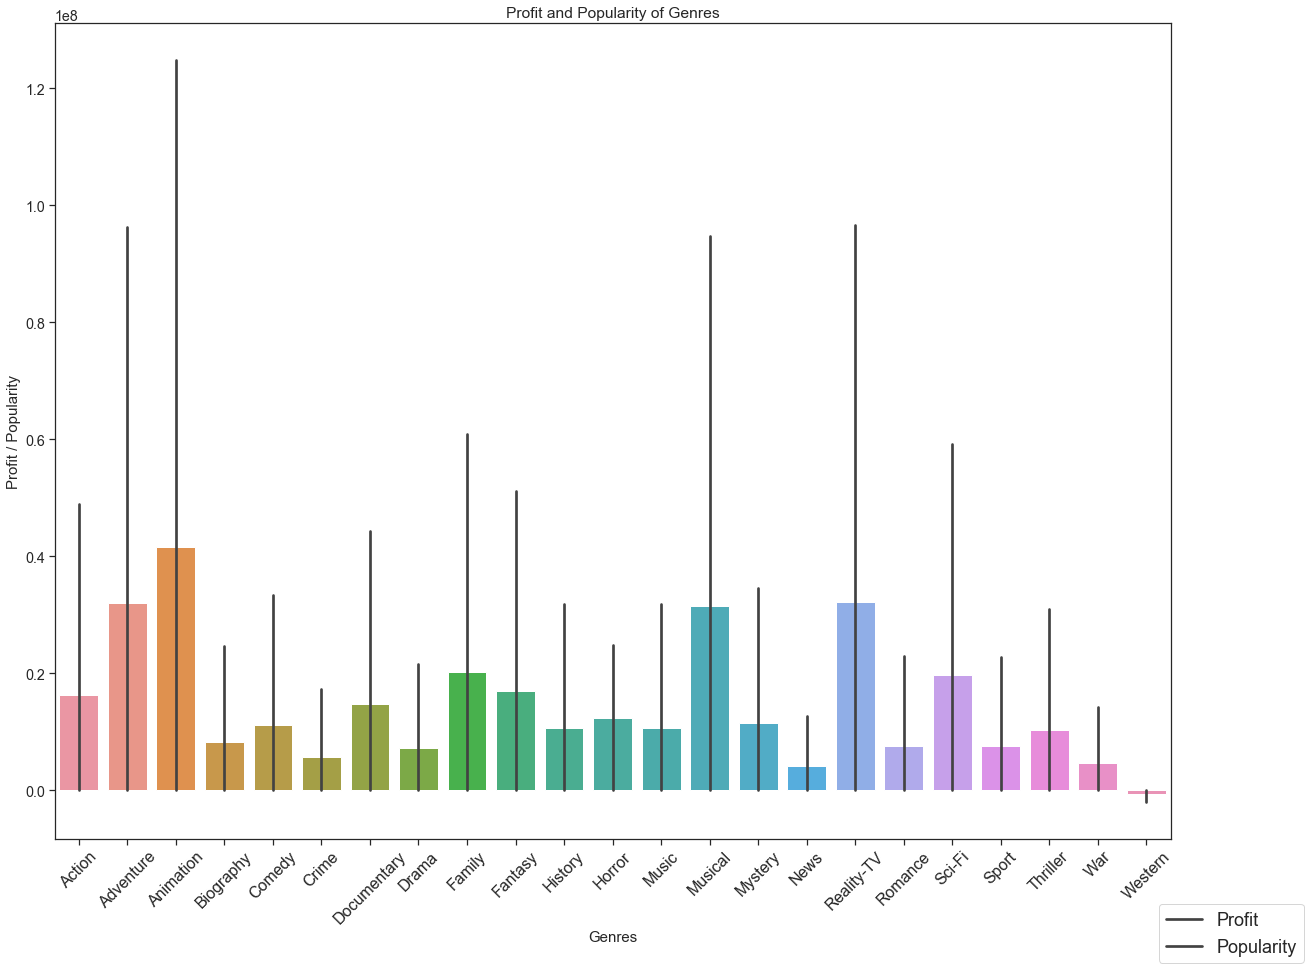

In [202]:
sns.set_style("ticks")

fig = plt.figure(figsize=(20,15))
fig.add_subplot(1,1,1)

ax = sns.barplot(data=genres_df)

ax.set( xlabel= 'Genres', ylabel= 'Profit / Popularity', title = 'Profit and Popularity of Genres')
xlabels = ax.get_xticklabels()

ax.set_xticklabels(xlabels,rotation=45, fontsize=16)
fig.legend(labels=['Profit','Popularity'], loc=4, fontsize=18)

Adventure, Animation, Musical and Reality-TV have high popularity and high profits.